In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from scipy import stats
import glob
import io
from PIL import Image

In [8]:
# Define the directory containing the CSV files
folder_path = '/Users/jio/Documents/DSP/kids'
csv_files = [filename for filename in os.listdir(folder_path) if filename.endswith("_B1.csv") and not filename.endswith("BaseNoise_B1.csv")]

In [9]:
output_directory = '/Users/jio/Documents/DSP/kids'
os.makedirs(output_directory, exist_ok=True)

def extract_step_number(file_name):
    match = re.search(r'(\d+)_B1', file_name)
    if match:
        step_number = match.group(1)
        return step_number
    return None

step_numbers = []
mean_values = []
std_values = []
stderr_values = []

for csv in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv), header=4)
    df = df[['Time [sec]', 'AE [V]']]

    file_name = os.path.splitext(csv)[0]
    step_number = extract_step_number(file_name)

    mean_value = df['AE [V]'].mean()
    std_value = df['AE [V]'].std()
    stderr_value = stats.sem(df['AE [V]'])

    step_numbers.append(step_number)
    mean_values.append(mean_value)
    std_values.append(std_value)
    stderr_values.append(stderr_value)

    plt.figure(figsize=(12, 6))
    plt.plot(df['Time [sec]'], df['AE [V]'], label='Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Acoustic Intensity')
    plt.title(f'Time Series Data for Step # {step_number}')
    plt.savefig(os.path.join(output_directory, f'{step_number}_timeseries.png'))
    plt.close()

    plt.figure(figsize=(12, 6))
    plt.hist(df['AE [V]'], bins=1000, label='Histogram')
    plt.xlabel('Acoustic Intensity')
    plt.ylabel('Count')
    plt.title(f'Histogram for Step # {step_number}')
    plt.savefig(os.path.join(output_directory, f'{step_number}_histogram.png'))
    plt.close()

In [ ]:
results_df = pd.DataFrame({'Step Number': step_numbers, 'Mean': mean_values, 'Std Deviation': std_values, 'Std Error': stderr_values})
results_df['Step Number'] = results_df['Step Number'].astype(int)
results_df = results_df.sort_values(by=['Step Number'])
results_csv = os.path.join(output_directory, 'step_statistics.csv')
results_df.to_csv(results_csv, index=False)

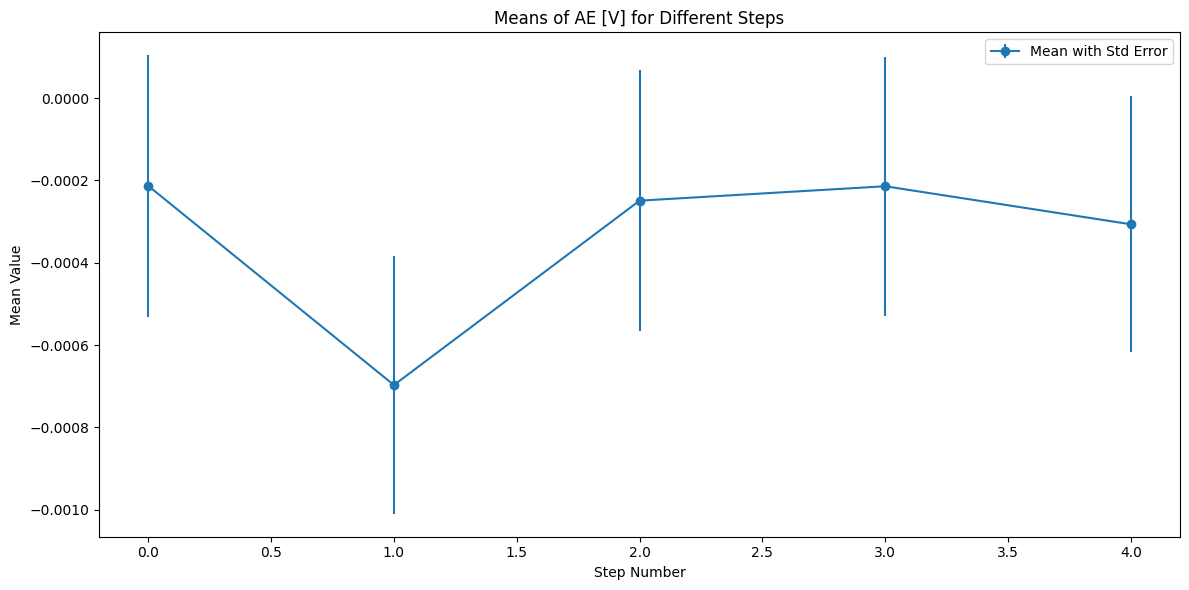

In [ ]:
plt.figure(figsize=(12, 6))
plt.errorbar(results_df['Step Number'], results_df['Mean'], yerr=results_df['Std Error'], fmt='o-', label='Mean with Std Error')
plt.xlabel('Step Number')
plt.ylabel('Mean Value')
plt.title('Means of AE [V] for Different Steps')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_directory, 'mean_values.png'))
plt.show()

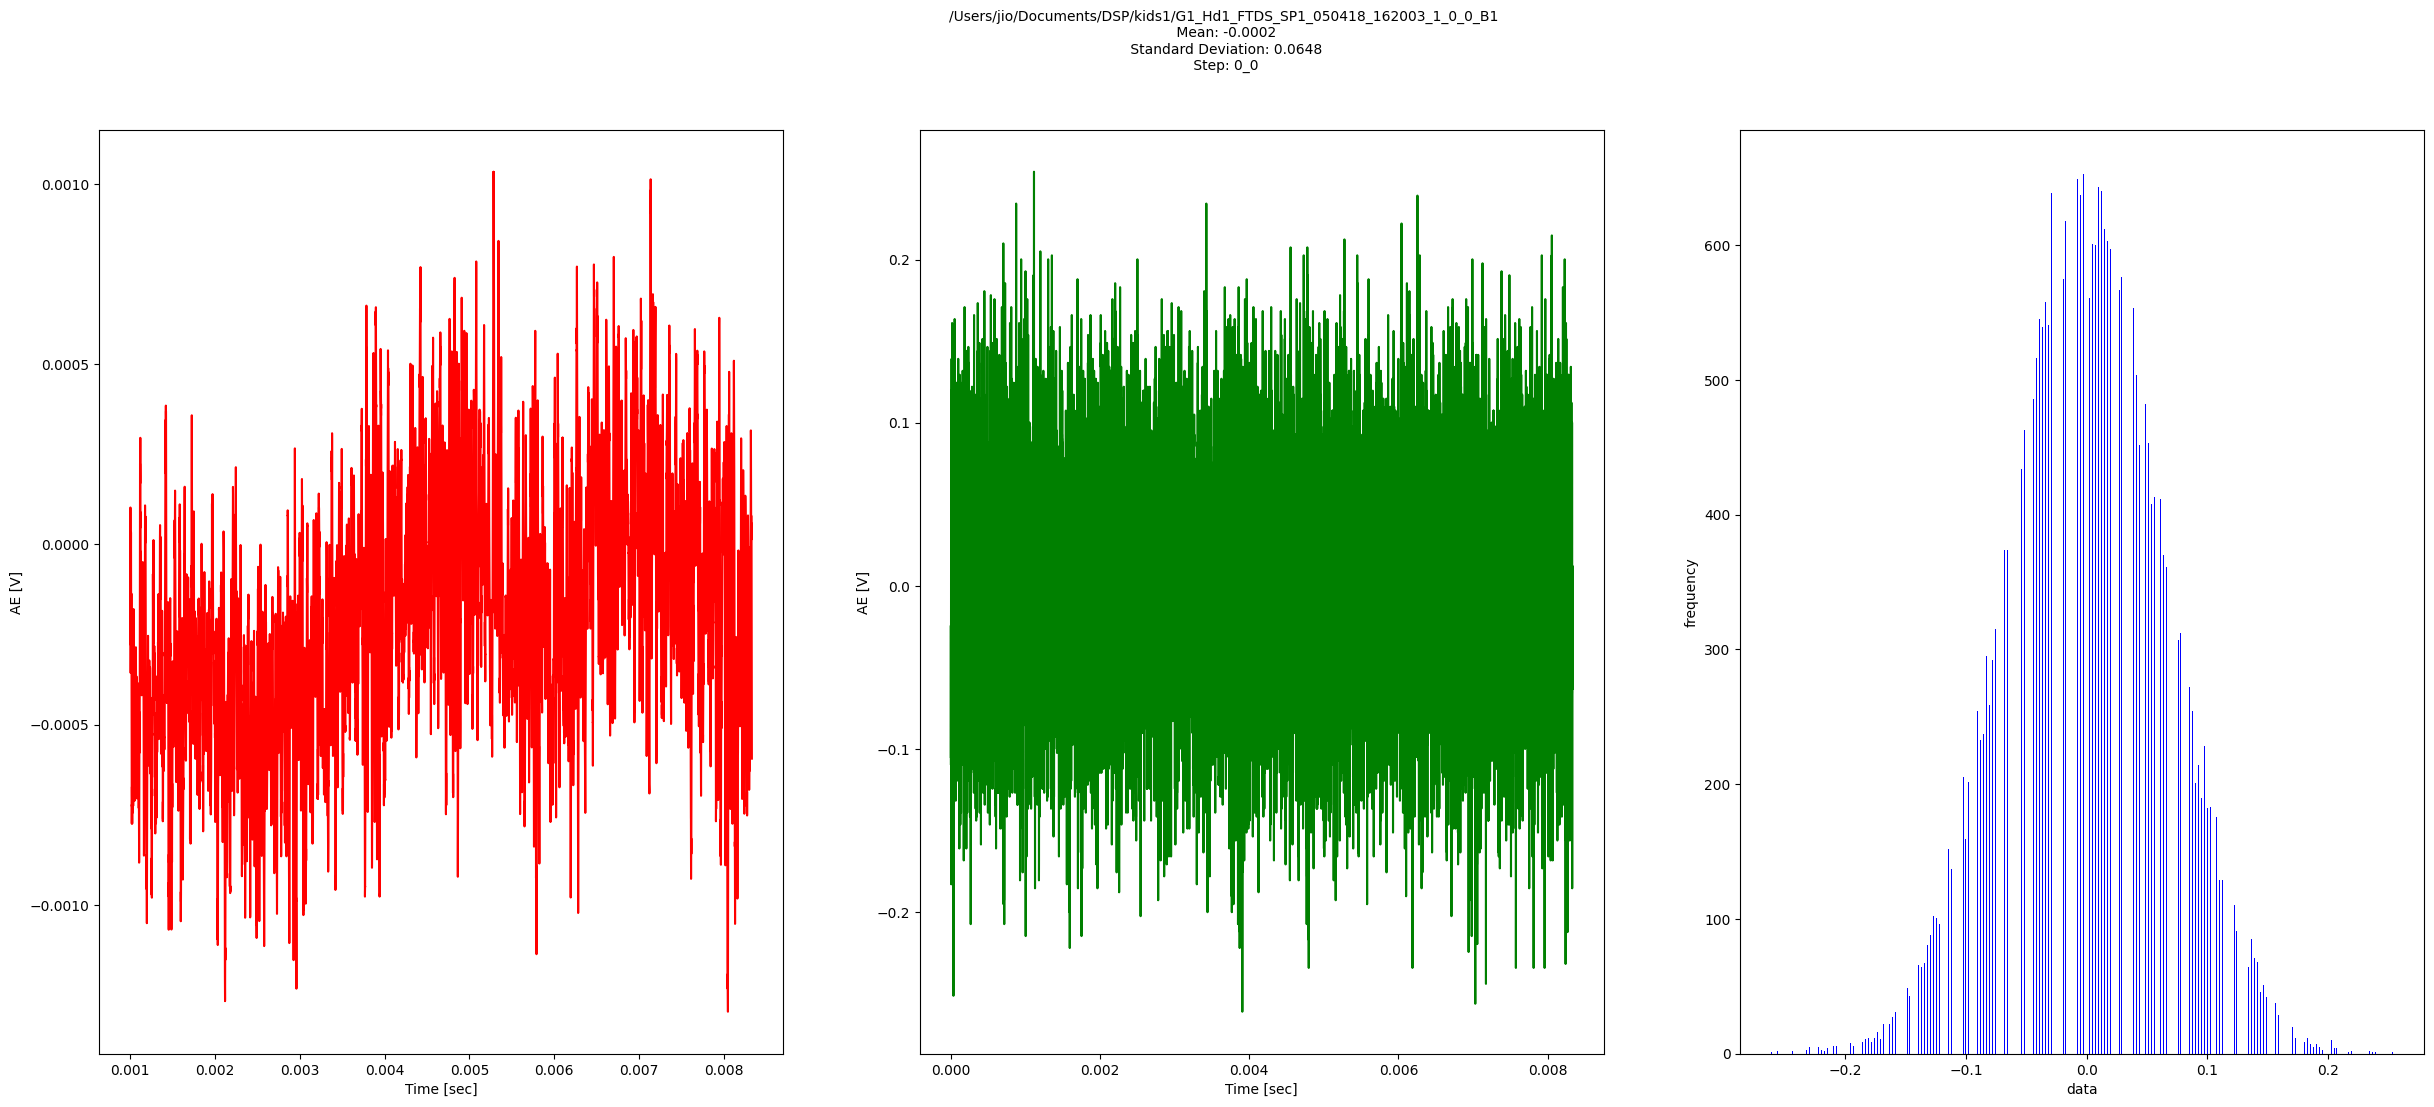

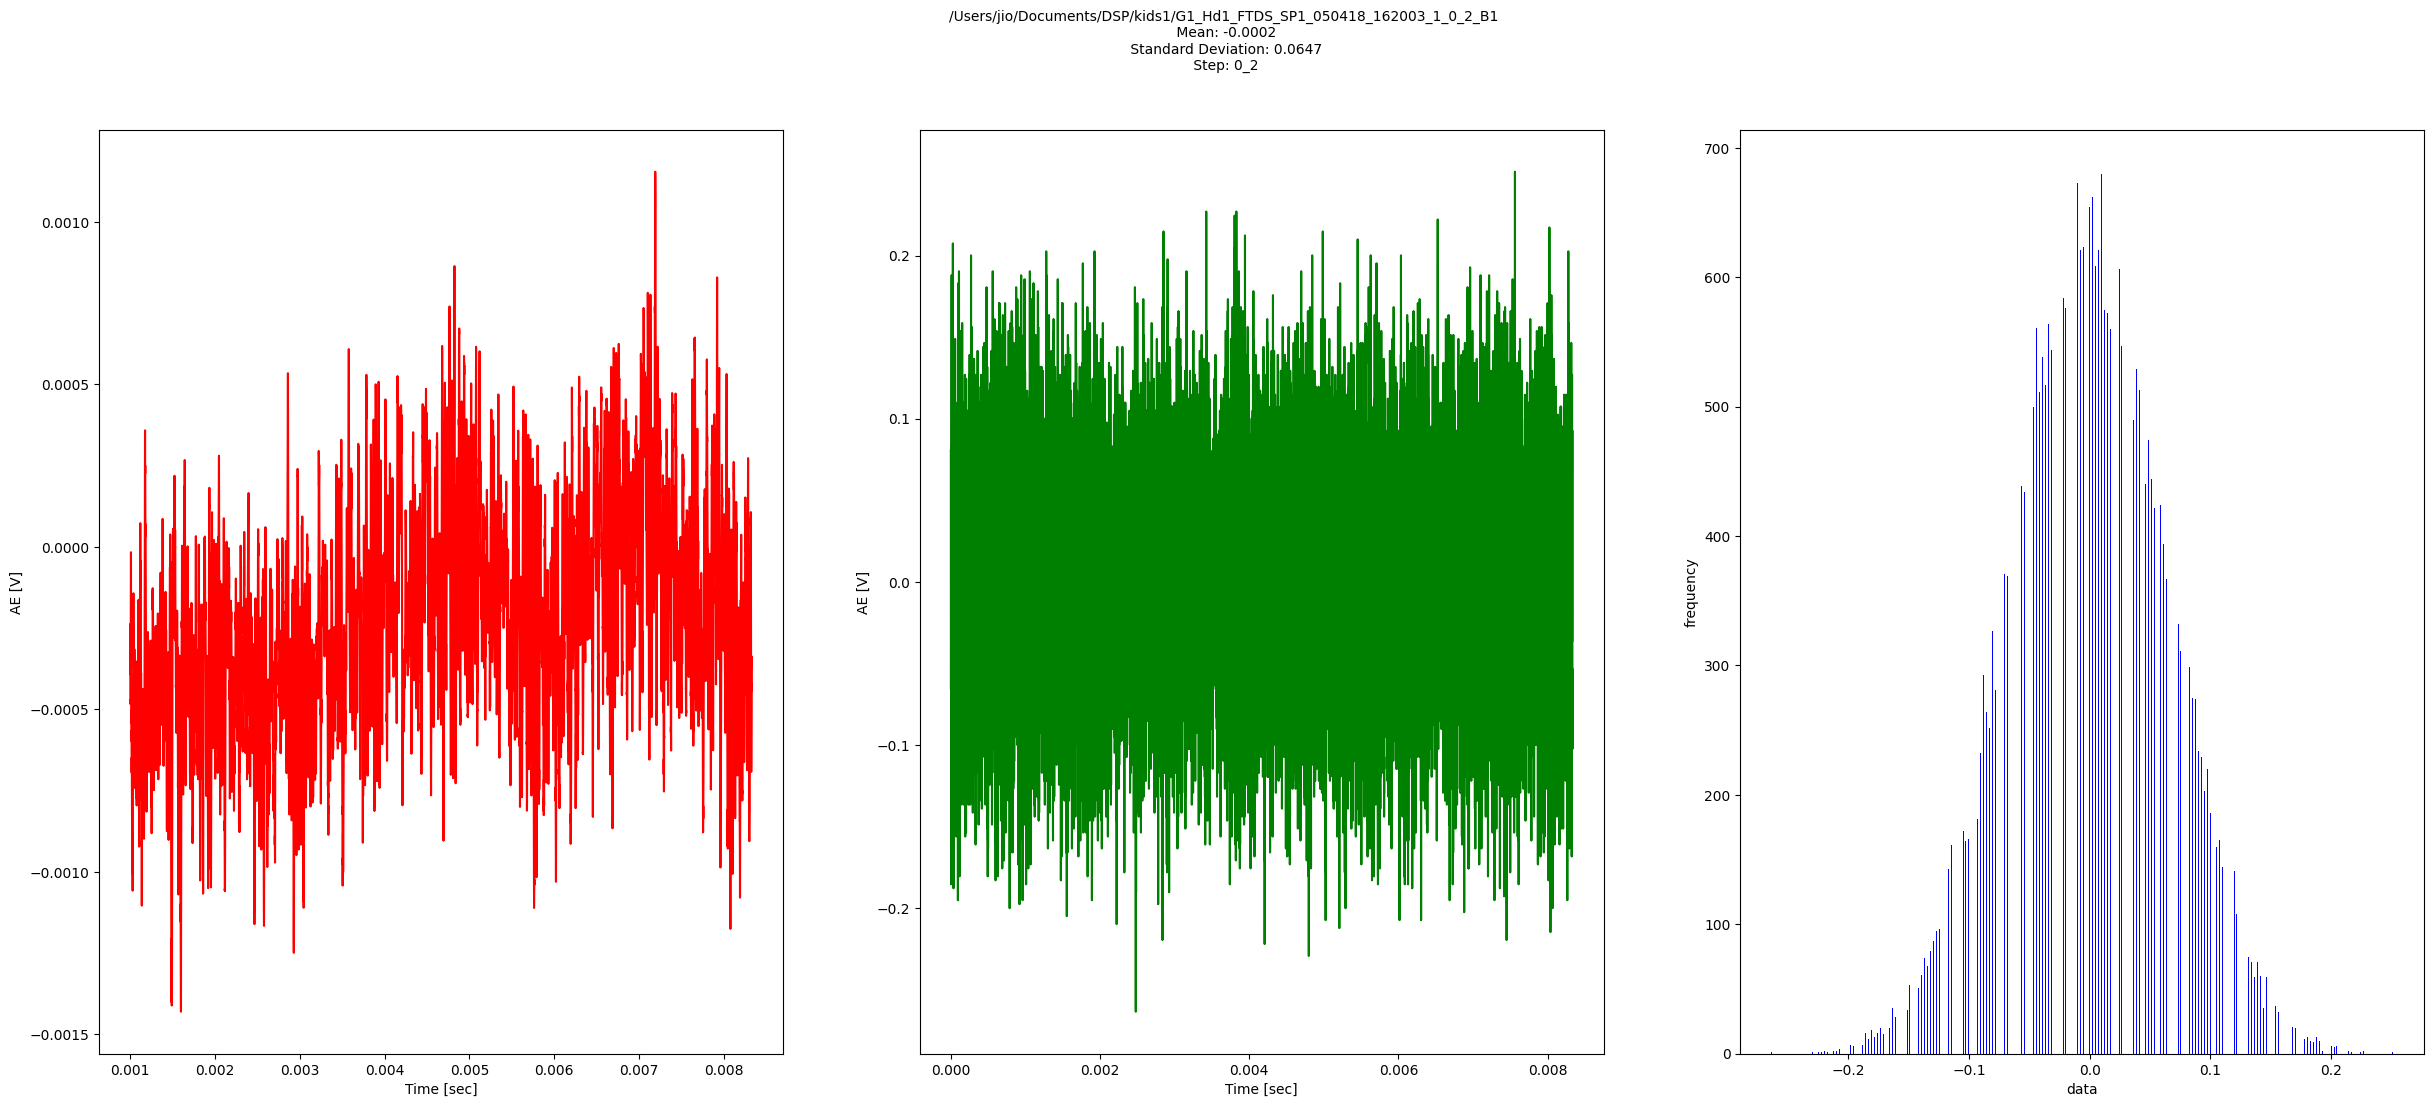

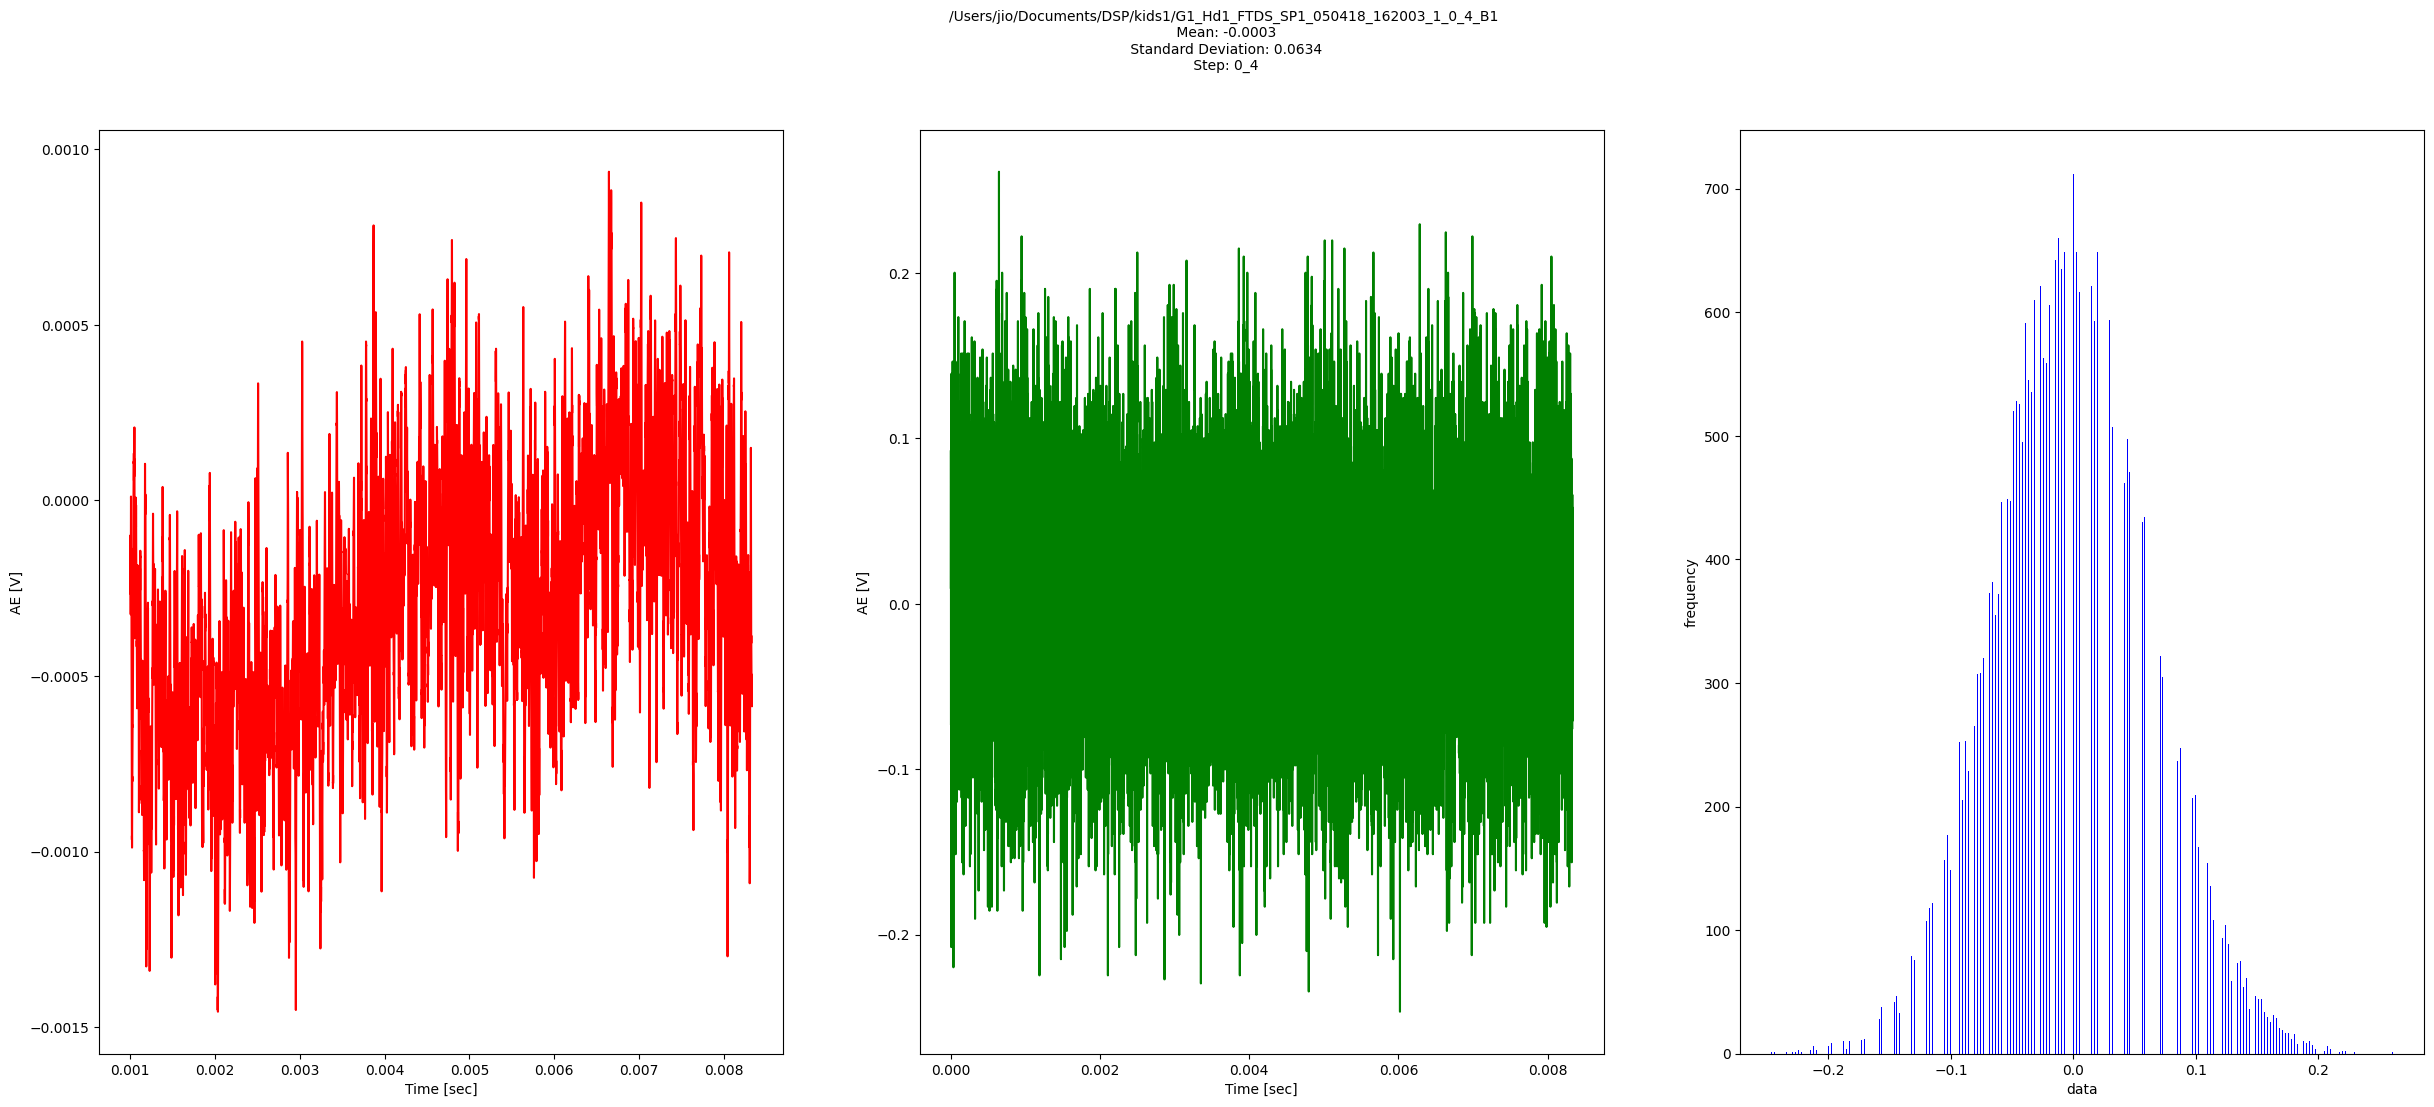

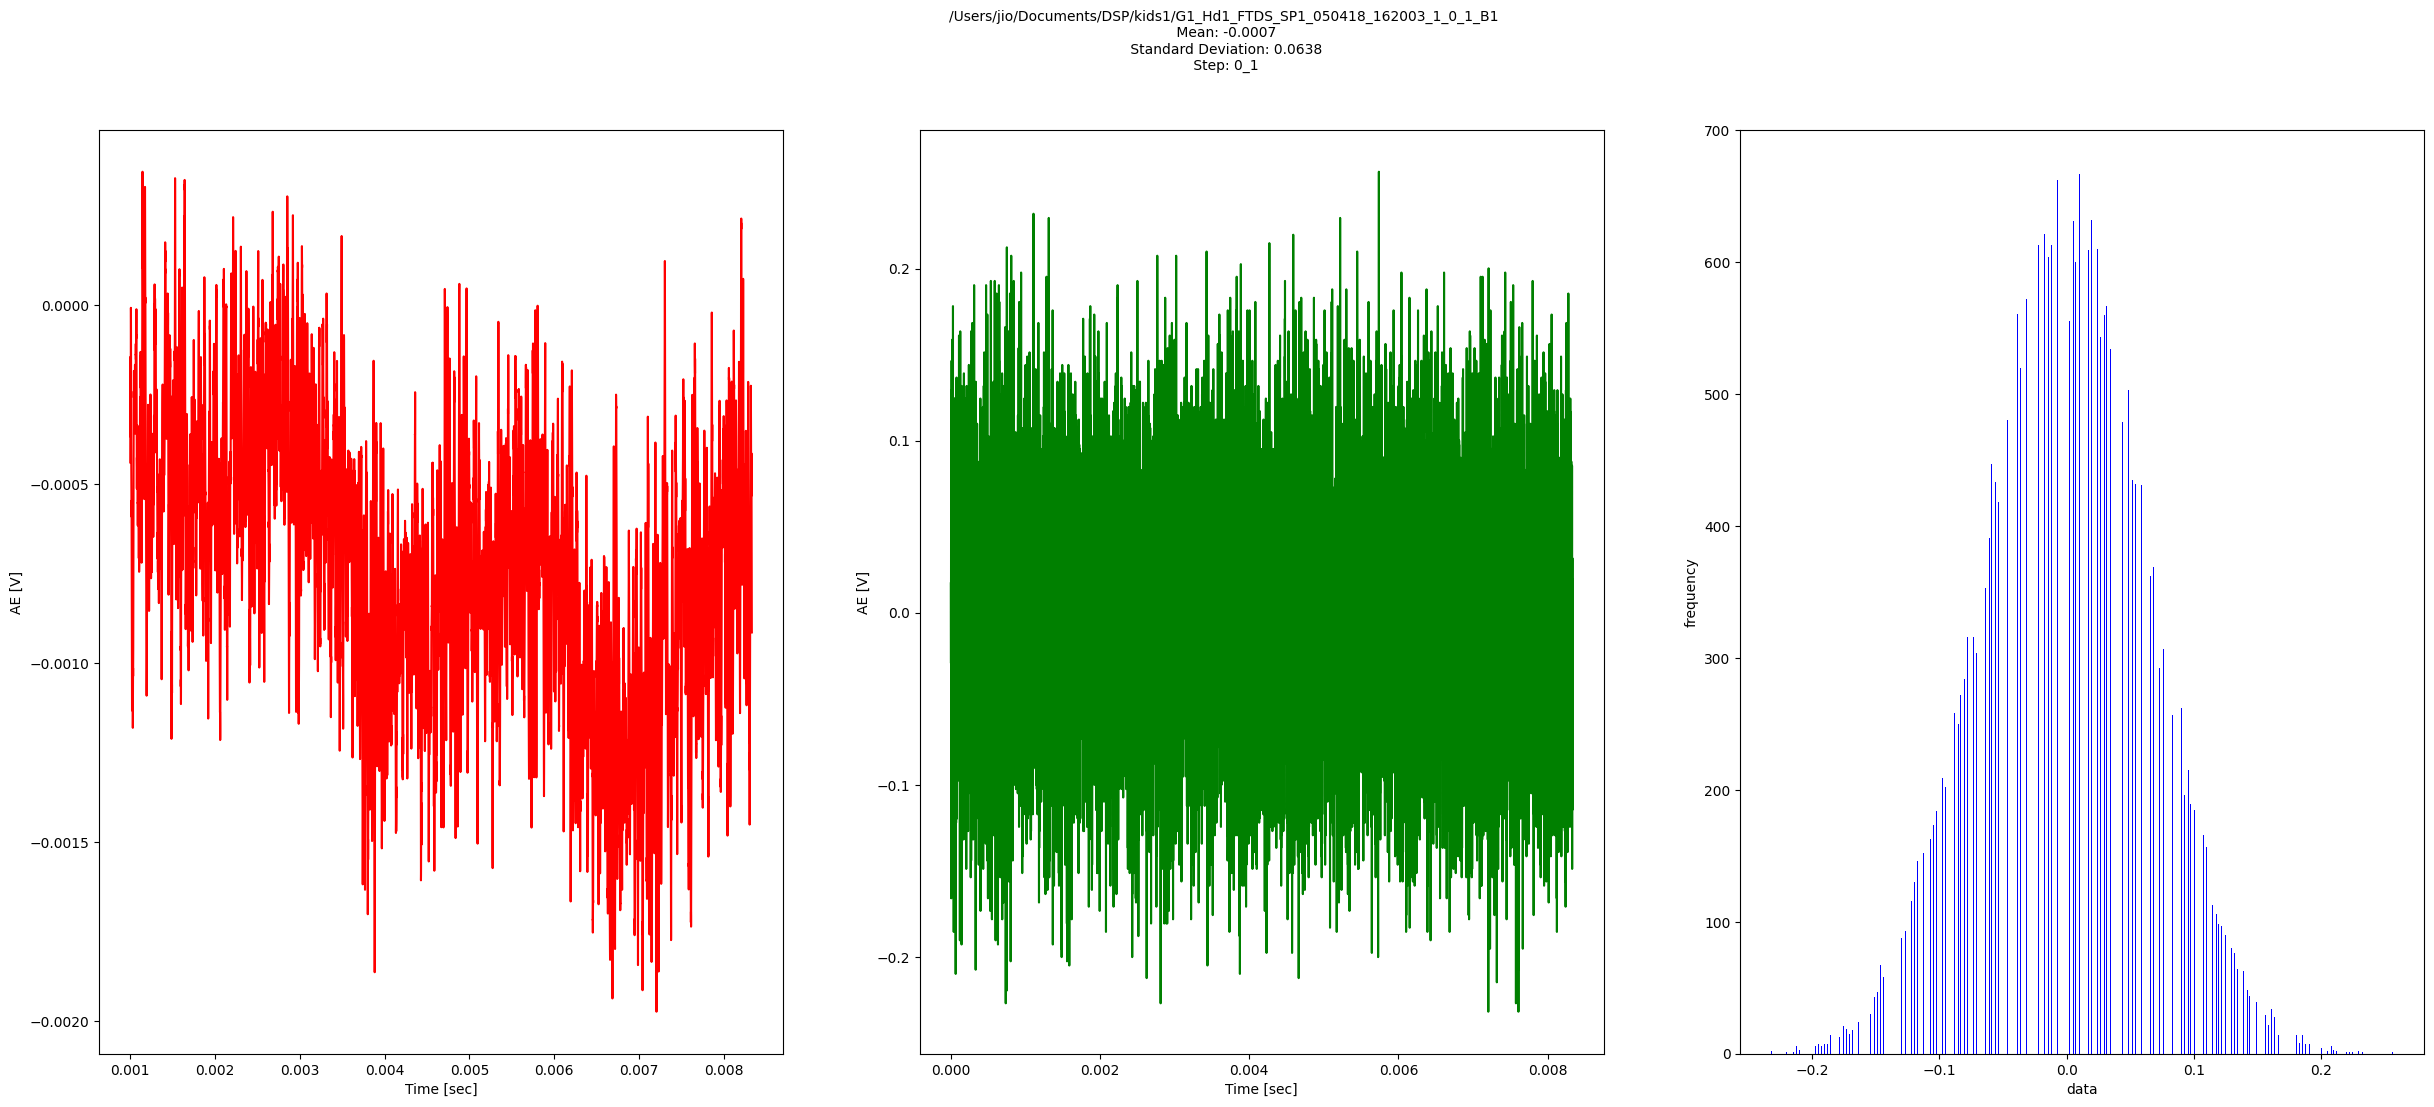

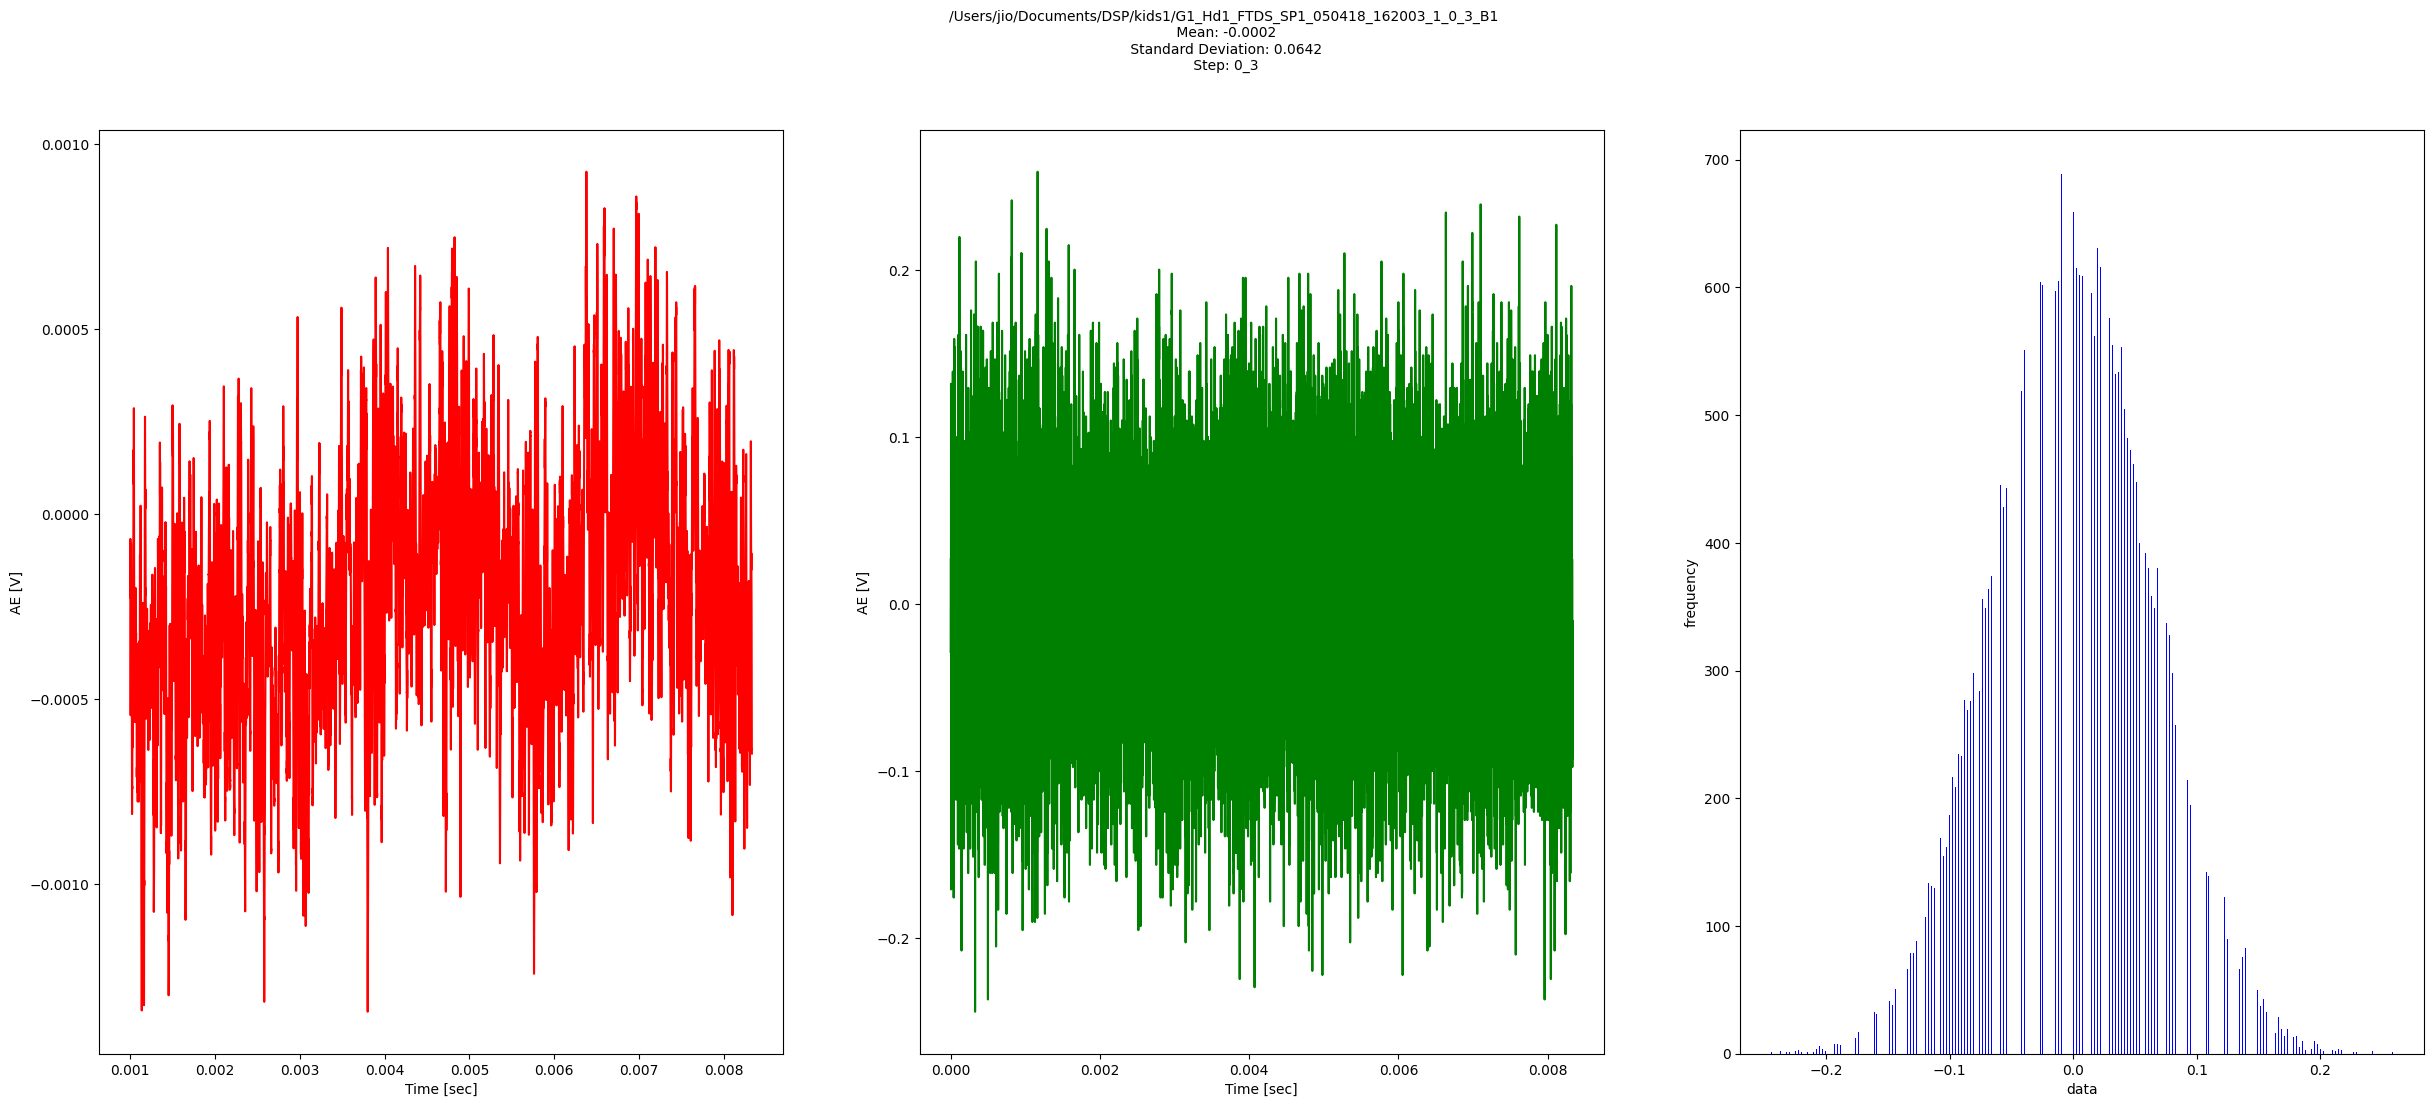

In [ ]:
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f, header=4)


    # print the location and filename
    cond = f.split("/")[-1][-6:-4]
    step_no = f.split("/")[-1][-10:-7]

    if cond == "B1":
      mean = df['AE [V]'].mean()
      std = df['AE [V]'].std()

      filename = os.path.splitext(f)[0]

      fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize =(30, 12))
      fig.suptitle(f'{filename}\n Mean: {mean:.4f}\n Standard Deviation: {std:.4f}\n Step: {step_no}', fontsize=10)

      ax0.plot(df['Time [sec]'], df['AE [V]'].rolling(5000).mean(), color='red')
      ax0.set_xlabel('Time [sec]')
      ax0.set_ylabel('AE [V]')

      ax1.plot(df['Time [sec]'], df['AE [V]'], color='green')
      ax1.set_xlabel('Time [sec]')
      ax1.set_ylabel('AE [V]')

      ax2.hist(np.array(df['AE [V]']), bins = 1000, color='blue')
      ax2.set_xlabel('data')
      ax2.set_ylabel('frequency')

      # Show plot
      plt.show()